In [4]:
# import packages, check folders
# %reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
# import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n', working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
# to store data we extract later in this notebook
data_file_loc = os.path.join(parent_folder, 'data')


current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [5]:
# setting default fontsizes for plots

s = 16  # CHANGE FONTSIZE HERE

plt.rc('font', size=s)  # controls default text size
plt.rc('axes', titlesize=s)  # fontsize of the title
plt.rc('axes', labelsize=s)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=s)  # fontsize of the x tick labels
plt.rc('ytick', labelsize=s)  # fontsize of the y tick labels
plt.rc('legend', fontsize=s)  # fontsize of the legend
plt.rcParams['savefig.facecolor'] = 'white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [6]:
# get the right red/blue shades
# red_rgb = [103,0,31] # edges of RdBu
# blue_rgb = [5,48,97] # edges of RdBu
red_rgb = [188, 61, 62]  # from Emily
blue_rgb = [54, 122, 177]  # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2  # transparency inside boxplots, for datapts etc.

# vid names as saved in behavioral data
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical",
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


In [7]:
# vid names as saved in behavioral data
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical",
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


In [8]:
# loading shen atlas labels
pd.set_option('display.max_colwidth', None)  # so columns are not snipped
# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc, "shen_dictionary.csv"))
shen268_lbl.head()
# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']


,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [9]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc, 'responses.npy'))
responses[0, :]


array([nan,  0.,  1., nan, nan,  1.,  1.,  0.,  1.,  9.])

In [10]:
tr0_ind = 3  # ind at which tr=0 starts
[timepts_indiv_movie, vid_start_rel_tr] = np.load(
    os.path.join(data_file_loc, 'Video_TRs.npy'), allow_pickle=True)

# move TR back and low-level regs forward, change to 0 for what we had before
tr_compensate = 1
if tr_compensate == 1:
    # vid_start_rel_tr stored are the first timepts AFTER t=0 (these were created for regressors originally, so without subtracting 1, each index
    vid_start_rel_tr -= 1
# we get (7, 14 etc.) was when the first nonzero regressor value was to be assigned)
# so without subtracting 1, we could potentially have been losing the earliest TR (check preprocess step 1_1 to verify)

print(vid_start_rel_tr)
l_task = 28


def remove_pretrial_TRs(tcs, vid_start_rel_tr, pretrial_TRs):
    # remove unnecessary BOLD timepts (everything not in the range [-3:28])
    tcs1 = np.empty((tcs.shape[0], tcs.shape[1],
                     28+pretrial_TRs, tcs.shape[3]))
    tcs1[:] = np.nan
    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:, :, :, vid_no] = tcs[:, :, tr0 -
                                    pretrial_TRs:tr0+28, vid_no]  # 31 timepts
    return tcs1


[6 13 13 13 13 6 13 13 13 13]


In [11]:
# COAX-BILL
# select subs who responded "Social" to COAXING-B and "Non-social" to BILLIARD-A
print('\nTrial-wise norm data.')
fileName = os.path.join(data_file_loc, 'timecourses_trial_norm',
                        'timecourse-all-movies_zscorenorm.npy')
tcs_trial_z = np.load(fileName)  # nsubs * nnodes * ntimepts *nmovies
print('before:', tcs_trial_z.shape)
# remove unwanted timepts from the fixtion blocks
tcs_trial_z = remove_pretrial_TRs(tcs_trial_z, vid_start_rel_tr, tr0_ind)
print('after:', tcs_trial_z.shape)

movie_ind_yes = 0  # CHANGE MOVIE IND HERE - "Social"
movie_ind_no = 1  # CHANGE MOVIE IND HERE - "Non-social"
print('"Social" movie: ' + str(vidnames[movie_ind_yes]))
print('"Non-social" movie: ' + str(vidnames[movie_ind_no]))



Trial-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)
"Social" movie: COAXING-B
"Non-social" movie: BILLIARD-A


In [12]:
# select subs who responded "Social" to the yes movie and "Non-social" to the no movie
print('\nrun-wise norm data.')
fileName = os.path.join(data_file_loc, 'timecourses_run_norm',
                        'timecourse-all-movies_zscorenorm.npy')  # load fmri data
tcs_run_z = np.load(fileName)  # nsubs * nnodes * ntimepts *nmovies
print('before:', tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z, vid_start_rel_tr, tr0_ind)
print('after:', tcs_run_z.shape)



run-wise norm data.
before: (1048, 268, 56, 10)
after: (1048, 268, 31, 10)


In [13]:
tr_compensate


1

in
in


<AxesSubplot:>

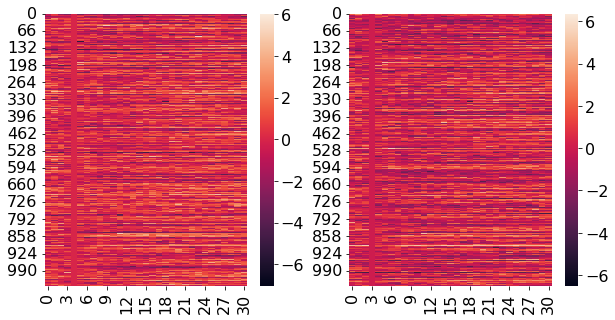

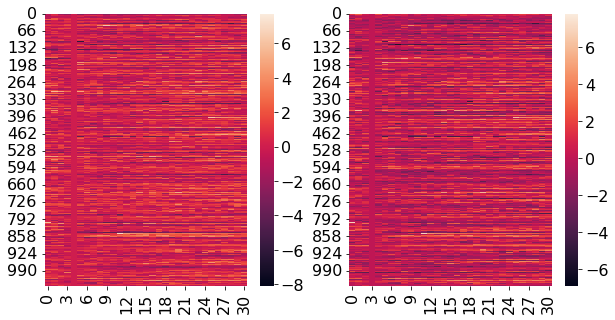

In [14]:
# if it's the 5th index that is 0, that means baseline correction was wrong. it should've been the 4th index. let's correct this/
plt.figure(1, figsize=(10, 5))
plt.subplot(121)
sns.heatmap(tcs_trial_z[:, 0, :, 0])
if tr_compensate == 1:
    if len(np.where(tcs_trial_z[:, 0, tr0_ind+1, 0] == 0)[0]) == tcs_trial_z.shape[0]:
        print('in')
        for s in range(tcs_trial_z.shape[0]):
            for n in range(tcs_trial_z.shape[1]):
                for m in range(10):
                    tcs_trial_z[s, n, :, m] = tcs_trial_z[s, n,
                                                          :, m] - tcs_trial_z[s, n, tr0_ind, m]
plt.subplot(122)
sns.heatmap(tcs_trial_z[:, 0, :, 0])


plt.figure(2, figsize=(10, 5))
plt.subplot(121)
sns.heatmap(tcs_run_z[:, 0, :, 0])
if tr_compensate == 1:
    if len(np.where(tcs_run_z[:, 0, tr0_ind+1, 0] == 0)[0]) == tcs_run_z.shape[0]:
        print('in')
        for s in range(tcs_run_z.shape[0]):
            for n in range(tcs_run_z.shape[1]):
                for m in range(10):
                    tcs_run_z[s, n, :, m] = tcs_run_z[s, n, :, m] - \
                        tcs_run_z[s, n, tr0_ind, m]
plt.subplot(122)
sns.heatmap(tcs_run_z[:, 0, :, 0])


# Plotting timecourses

In [15]:
# for comparison with the other main figure if needed
# sig nodes hihglighted in the first S>NS GLM
nodes_coaxbill_rand_all = np.load(os.path.join(
    data_file_loc, 'nodes_coaxbill_rand_all.npy'))
len(np.where(nodes_coaxbill_rand_all)[0])


81

In [16]:
tr0_ind = 3


In [17]:
# if tr_compensate==1:
early_late = 'early'
# else:
#    early_late = 'late'
# print(early_late)


In [18]:
[earliest_pt_coaxbill, sign_earliest_pt_coaxbill] = np.load(
    os.path.join(data_file_loc, f'earliest_pt_div_coaxbill_{early_late}.npy'))
[end_diff_coaxbill, sign_end_diff_coaxbill] = np.load(
    os.path.join(data_file_loc, f'end_pt_div_coaxbill_{early_late}.npy'))
[earliest_pt_coaxbill_resid, sign_earliest_pt_coaxbill_resid] = np.load(
    os.path.join(data_file_loc, f'earliest_pt_div_coaxbill_resid_{early_late}.npy'))
[end_diff_coaxbill_resid, sign_end_diff_coaxbill_resid] = np.load(
    os.path.join(data_file_loc, f'end_pt_div_coaxbill_resid_{early_late}.npy'))

earliest_pt_coaxbill_corrected = earliest_pt_coaxbill - tr0_ind
earliest_pt_coaxbill_resid_corrected = earliest_pt_coaxbill_resid - tr0_ind


In [19]:
'''
[earliest_pt_all_nocoaxbill,sign_earliest_pt_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill.npy'))
[end_diff_all_nocoaxbill1,sign_end_diff_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'end_pt_div_allmovies_nocoaxbill.npy'))
[earliest_pt_all_nocoaxbill_res,sign_earliest_pt_all_nocoaxbill_res] = np.load(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill_resid.npy'))

earliest_pt_all_nocoaxbill_corrected = earliest_pt_all_nocoaxbill - tr0_ind
eearliest_pt_all_nocoaxbill_res_corrected = earliest_pt_all_nocoaxbill_res - tr0_ind'''


"\n[earliest_pt_all_nocoaxbill,sign_earliest_pt_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill.npy'))\n[end_diff_all_nocoaxbill1,sign_end_diff_all_nocoaxbill] = np.load(os.path.join(data_file_loc,'end_pt_div_allmovies_nocoaxbill.npy'))\n[earliest_pt_all_nocoaxbill_res,sign_earliest_pt_all_nocoaxbill_res] = np.load(os.path.join(data_file_loc,'earliest_pt_div_allmovies_nocoaxbill_resid.npy'))\n\nearliest_pt_all_nocoaxbill_corrected = earliest_pt_all_nocoaxbill - tr0_ind\neearliest_pt_all_nocoaxbill_res_corrected = earliest_pt_all_nocoaxbill_res - tr0_ind"

In [20]:
# selecting nodes with MNI coordinates' centres within 5 pts of slices -10 and 0 which show the ventral visual pathway, and also don't have 'frontal' in their description
#nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
nodes_ind = nodes_coaxbill_rand_all
zslices = [-10, 30]
near_thr = 10
print('Node(1-268), MNI coordinates, Node label')
good_nodes = []
for n in np.where(nodes_ind)[0]:
    coords = eval(shen268_lbl[str(n+1)][0])['coords']
    # if ((abs(coords[2] -  zslices[0]) < near_thr) | (abs(coords[2]-zslices[1]) < near_thr)) & ('Frontal'  in eval(shen268_lbl[str(n+1)][0])['name']):
    #print(n,earliest_pt_coaxbill_corrected[n], [np.round(i) for i in eval(shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name'])
    hem = 'R' if n < 134 else 'L'
    good_nodes.append([n+1, hem, earliest_pt_coaxbill_corrected[n], [np.round(i)
                                                                     for i in eval(shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name']])

df = pd.DataFrame(good_nodes, columns=[
                  'Node (1-268)', 'Hem', 'Earliest div pt', 'MNI coordinates', 'ROI name'])
df.sort_values(by='Earliest div pt', inplace=True)
df.head(20)


Node(1-268), MNI coordinates, Node label


,Node (1-268),Hem,Earliest div pt,MNI coordinates,ROI name
58,200,L,1.0,"[-43.0, -52.0, -17.0]",53.17% Temporal_Occipital_Fusiform_Cortex; 42.99% Inferior_Temporal_Gyrus_temporooccipital_part
61,206,L,1.0,"[-43.0, -70.0, -14.0]",55.19% Lateral_Occipital_Cortex_inferior_division; 29.41% Occipital_Fusiform_Gyrus; 8.65% Temporal_Occipital_Fusiform_Cortex; 6.75% Inferior_Temporal_Gyrus_temporooccipital_part
54,192,L,1.0,"[-58.0, -48.0, 5.0]",52.60% Middle_Temporal_Gyrus_temporooccipital_part; 21.00% Supramarginal_Gyrus_posterior_division; 14.85% Middle_Temporal_Gyrus_posterior_division; 7.53% Superior_Temporal_Gyrus_posterior_division
21,71,R,1.0,"[42.0, -46.0, -23.0]",65.90% Temporal_Occipital_Fusiform_Cortex; 17.05% Inferior_Temporal_Gyrus_temporooccipital_part; 9.84% Temporal_Fusiform_Cortex_posterior_division
49,157,L,1.0,"[-46.0, 8.0, 29.0]",50.95% Precentral_Gyrus; 27.86% Middle_Frontal_Gyrus; 21.19% Inferior_Frontal_Gyrus_pars_opercularis
20,70,R,2.0,"[61.0, -43.0, -18.0]",54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_posterior_division
18,67,R,2.0,"[37.0, -69.0, -17.0]",54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
16,65,R,2.0,"[59.0, -44.0, 9.0]",51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
65,210,L,2.0,"[-36.0, -84.0, -4.0]",80.83% Lateral_Occipital_Cortex_inferior_division; 10.06% Occipital_Fusiform_Gyrus; 9.11% Occipital_Pole
46,153,L,2.0,"[-32.0, 20.0, -16.0]",78.97% Frontal_Orbital_Cortex; 18.35% Insular_Cortex


(81, 5)

In [31]:
df.loc[(df['Hem'] == 'L') & (df['Earliest div pt'] == 4)]


,Node (1-268),Hem,Earliest div pt,MNI coordinates,ROI name
57,199,L,4.0,"[-60.0, -50.0, -14.0]",43.70% Inferior_Temporal_Gyrus_temporooccipital_part; 24.81% Middle_Temporal_Gyrus_temporooccipital_part; 15.32% Middle_Temporal_Gyrus_posterior_division; 10.71% Inferior_Temporal_Gyrus_posterior_division
70,236,L,4.0,"[-6.0, -66.0, -38.0]",100.00% no_label
77,247,L,4.0,"[-10.0, -82.0, -32.0]",80.45% no_label; 9.08% Occipital_Fusiform_Gyrus; 5.87% Lingual_Gyrus
67,213,L,4.0,"[-15.0, -84.0, -13.0]",52.00% Occipital_Fusiform_Gyrus; 34.15% Lingual_Gyrus; 13.03% Occipital_Pole
66,212,L,4.0,"[-11.0, -98.0, 8.0]",99.66% Occipital_Pole
76,246,L,4.0,"[-43.0, -64.0, -46.0]",100.00% no_label
72,240,L,4.0,"[-21.0, -70.0, -49.0]",100.00% no_label
51,183,L,4.0,"[-51.0, -56.0, 20.0]",54.25% Angular_Gyrus; 17.20% Lateral_Occipital_Cortex_superior_division; 16.45% Supramarginal_Gyrus_posterior_division; 8.92% Middle_Temporal_Gyrus_temporooccipital_part
71,238,L,4.0,"[-37.0, -53.0, -31.0]",80.36% no_label; 12.97% Temporal_Occipital_Fusiform_Cortex; 5.23% Temporal_Fusiform_Cortex_posterior_division


In [77]:
# selecting nodes with MNI coordinates' centres within 5 pts of slices -10 and 0 which show the ventral visual pathway, and also don't have 'frontal' in their description
#nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
nodes_ind = nodes_coaxbill_rand_all
zslices = [-10, 30]
near_thr = 10
print('Node(1-268), MNI coordinates, Node label')
good_nodes = []
for n in np.where(nodes_ind)[0]:
    coords = eval(shen268_lbl[str(n+1)][0])['coords']
    if ((abs(coords[2] - zslices[0]) < near_thr) | (abs(coords[2]-zslices[1]) < near_thr)) & ('Frontal' in eval(shen268_lbl[str(n+1)][0])['name']):
        print(n, earliest_pt_coaxbill_corrected[n], [np.round(i) for i in eval(
            shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name'])
        good_nodes.append(n)


Node(1-268), MNI coordinates, Node label
9 6.0 [9.0, 53.0, 24.0] 48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
12 5.0 [24.0, 31.0, 36.0] 33.82% Middle_Frontal_Gyrus; 33.82% Frontal_Pole; 26.94% Superior_Frontal_Gyrus; 5.42% no_label
21 16.0 [40.0, 18.0, 29.0] 76.55% Middle_Frontal_Gyrus; 21.03% Inferior_Frontal_Gyrus_pars_opercularis
30 14.0 [40.0, 3.0, 34.0] 75.69% Precentral_Gyrus; 20.60% Middle_Frontal_Gyrus
144 23.0 [-10.0, 56.0, 30.0] 78.35% Frontal_Pole; 21.65% Superior_Frontal_Gyrus
146 8.0 [-46.0, 28.0, 27.0] 66.70% Middle_Frontal_Gyrus; 17.50% Inferior_Frontal_Gyrus_pars_triangularis; 8.86% Frontal_Pole; 6.14% Inferior_Frontal_Gyrus_pars_opercularis
150 6.0 [-46.0, 28.0, -7.0] 51.03% Frontal_Orbital_Cortex; 25.77% Inferior_Frontal_Gyrus_pars_triangularis; 11.73% Frontal_Pole; 8.38% Frontal_Operculum_Cortex
152 2.0 [-32.0, 20.0, -16.0] 78.97% Frontal_Orbital_Cortex; 18.35% Insular_Cortex
156 1.0 [-46.0, 8.0, 29.0] 50.95% Precentral_Gyrus; 27.86%

In [20]:
# selecting nodes with MNI coordinates' centres within 5 pts of slices -10 and 0 which show the ventral visual pathway, and also don't have 'frontal' in their description
#nodes_ind = (end_diff_coaxbill==1) & nodes_coaxbill_rand_all
nodes_ind = nodes_coaxbill_rand_all
zslices = [-10, 0]
near_thr = 10
print('Node(1-268), MNI coordinates, Node label')
good_nodes = []
for n in np.where(nodes_ind)[0]:
    coords = eval(shen268_lbl[str(n+1)][0])['coords']
    if ((abs(coords[2] - zslices[0]) < near_thr) | (abs(coords[2]-zslices[1]) < near_thr)) & ('Frontal' not in eval(shen268_lbl[str(n+1)][0])['name']):
        print(n, earliest_pt_coaxbill_corrected[n], [np.round(i) for i in eval(
            shen268_lbl[str(n+1)][0])['coords']], eval(shen268_lbl[str(n+1)][0])['name'])
        good_nodes.append(n)


Node(1-268), MNI coordinates, Node label
64 2.0 [59.0, -44.0, 9.0] 51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
65 2.0 [47.0, -60.0, -15.0] 35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
66 2.0 [37.0, -69.0, -17.0] 54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
68 3.0 [55.0, -56.0, -5.0] 48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
69 2.0 [61.0, -43.0, -18.0] 54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_poste

In [21]:
' '.join([str(i) for i in good_nodes])


'64 65 66 68 69 73 75 77 80 127 190 191 196 197 198 199 205 206 208 209 211 212 213'

In [22]:
node_tcs_minus10_0 = {'right': [64, 65, 66, 68, 69, 73, 75, 77, 80, 127], 'left': [
    190, 191, 196, 197, 198, 199, 205, 206, 208, 209, 211, 212, 213]}  # node indices (0-267) when near_thr = 10
# node_tcs_minus10_0 = {'right': [64,65,66,68,69,73,75, 77,80,127], 'left': [190,191, 196,197,198,205,206,208,209,211,212,213]} #  node indices (0-267) when near_thr = 10
# Manually selecting node indices based on the description above (e.g. removing subcortical nodes)
# node_tcs_minus10 = {'right': [65,68,69,75,80], 'left': [196,197,198,205,206,209,212,213]} # node indices (0-267) when near_thr = 5


In [23]:
left_nodes_ind = node_tcs_minus10_0['left']
MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in left_nodes_ind]
MNIz = [eval(shen268_lbl[str(n+1)][0])['coords'][2] for n in left_nodes_ind]
ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in left_nodes_ind]
df_minus10_0_left = pd.DataFrame({'Nodes': left_nodes_ind, 'Earliest_pt_corr_resid': earliest_pt_coaxbill_resid[
                                 left_nodes_ind], 'Earliest_pt_corr': earliest_pt_coaxbill_corrected[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz, 'name': ROIname})
df_minus10_0_left = df_minus10_0_left.sort_values(
    by=['Earliest_pt_corr_resid', 'MNIy'])
df_minus10_0_left = df_minus10_0_left.reset_index()
print(df_minus10_0_left.shape)
df_minus10_0_left.head()

# same as above, left-aligned
'''df_minus10_0_disp = pd.DataFrame({'Nodes':left_nodes_ind, 'Earliest_pt': earliest_pt_coaxbill[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})
df_minus10_0_disp['Nodes'] = [i+1 for i in df_minus10_0_disp['Nodes']]
df_minus10_0_disp = df_minus10_0_disp.sort_values(by=['Earliest_pt', 'MNIy'])
df_minus10_0_disp = df_minus10_0_disp.reset_index()
print(df_minus10_0_disp.shape)
df_minus10_0_disp.head()
df_minus10_0_disp = df_minus10_0_disp.style.set_properties(**{'text-align': 'left'})
df_minus10_0_disp'''


(13, 7)


"df_minus10_0_disp = pd.DataFrame({'Nodes':left_nodes_ind, 'Earliest_pt': earliest_pt_coaxbill[left_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz,'name':ROIname})\ndf_minus10_0_disp['Nodes'] = [i+1 for i in df_minus10_0_disp['Nodes']]\ndf_minus10_0_disp = df_minus10_0_disp.sort_values(by=['Earliest_pt', 'MNIy'])\ndf_minus10_0_disp = df_minus10_0_disp.reset_index()\nprint(df_minus10_0_disp.shape)\ndf_minus10_0_disp.head()\ndf_minus10_0_disp = df_minus10_0_disp.style.set_properties(**{'text-align': 'left'})\ndf_minus10_0_disp"

In [24]:
right_nodes_ind = node_tcs_minus10_0['right']
MNIy = [eval(shen268_lbl[str(n+1)][0])['coords'][1] for n in right_nodes_ind]
MNIz = [eval(shen268_lbl[str(n+1)][0])['coords'][2] for n in right_nodes_ind]
ROIname = [eval(shen268_lbl[str(n+1)][0])['name'] for n in right_nodes_ind]
df_minus10_0_right = pd.DataFrame({'Nodes': right_nodes_ind, 'Earliest_pt_corr_resid': earliest_pt_coaxbill_resid[
                                  right_nodes_ind], 'Earliest_pt_corr': earliest_pt_coaxbill_corrected[right_nodes_ind], 'MNIy': MNIy, 'MNIz': MNIz, 'name': ROIname})
df_minus10_0_right = df_minus10_0_right.sort_values(
    by=['Earliest_pt_corr_resid', 'MNIy'])
df_minus10_0_right = df_minus10_0_right.reset_index()
print(df_minus10_0_right.shape)
df_minus10_0_right
df_minus10_0_right.head()


(10, 7)


,index,Nodes,Earliest_pt_corr_resid,Earliest_pt_corr,MNIy,MNIz,name
0,2,66,5.0,2.0,-69.279029,-17.441941,54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
1,1,65,5.0,2.0,-59.801802,-14.716216,35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
2,0,64,5.0,2.0,-43.727367,8.616025,51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
3,4,69,5.0,2.0,-43.375770,-17.652977,54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_posterior_division
4,8,80,6.0,3.0,-91.904468,-10.795069,55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus


In [25]:
# import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
#from nilearn.plotting import plot_glass_brain,plot_stat_map,plot_surf,view_img_on_surf,plot_img
from nilearn.plotting import plot_surf_roi, plot_img, plot_surf_contours
from nilearn import datasets, surface
import nibabel as nib

#import nilearn
# nilearn.__version__ # .7.0 in py37 env

mask = Brain_Data(
    'https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

fsaverage = datasets.fetch_surf_fsaverage()

shen268_lbl = pd.read_csv(os.path.join(data_file_loc, "shen_dictionary.csv"))
# shen268_lbl

bg_img = datasets.load_mni152_template()

lbl = [str.upper(x[0:4]) for x in vidnames]
lbl


['COAX',
 'BILL',
 'DRIF',
 'FISH',
 'RAND',
 'SCAR',
 'SEDU',
 'STAR',
 'SURP',
 'TENN']

In [26]:
fig_save_loc = os.path.join(
    '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/')


In [42]:
# Plot and save ROIs - axial plots
def plot_slice(fig, ax, row, hem):
    zslices = [-10, 0]
    # for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
    # print('row:',row[0])
    n = int(row[1]['Nodes'])
    nodes = np.zeros((268,))
    nodes[n] = 1
    img = roi_to_brain(pd.Series(nodes), mask_x)
    zsl = row[1]['MNIz']
    if np.abs(zsl-zslices[0]) < np.abs(zsl-zslices[1]):
        zsl = zslices[0]
    else:
        zsl = zslices[1]
    #out = os.path.join(fig_save_loc, f'ROIs/axial/nodes_minus10_0_right/{row}_node_ind{n}.png')
    #out = os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_right/{i}_node_ind{n}.png')
    if zsl == 0:
        title_txt = 'z= ' + str(zsl) + ' '
    elif zsl == -10:
        title_txt = 'z=' + str(zsl)
    ax_plot = plot_img(img.to_nifti(), annotate=False, title=title_txt, display_mode='z', cut_coords=[
                       zsl], bg_img=bg_img, colorbar=False, threshold=.1, axes=ax, figure=fig)
    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    # print(ymin,ymax)
    # print(xmin,xmax)

    if hem == 'left':
        plt.ylim(ymin, 10)
        plt.xlim(xmin, 10)
    elif hem == 'right':
        plt.ylim(ymin, 10)
        plt.xlim(-10, xmax)

ncols = 5
nrows = int(np.ceil(df_minus10_0_right.shape[0]/ncols))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 7))
plt.suptitle('right')
for row in df_minus10_0_right.iterrows():  # for i,n in enumerate(df['Nodes']):
    r, c = int(np.floor(row[0]/5)), row[0] % 5
    # print(r,c)
    plot_slice(fig, ax[r, c], row, 'right')
    #fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3))
    # plot_slice(fig,ax,row)
for i in range(int(nrows*ncols-df_minus10_0_right.shape[0])):
    ax[r, c+1+i].axis('off')
#plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nrows = int(np.ceil(df_minus10_0_left.shape[0]/ncols))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10.5))
plt.suptitle('left')
for row in df_minus10_0_left.iterrows():  # for i,n in enumerate(df['Nodes']):
    r, c = int(np.floor(row[0]/5)), row[0] % 5
    # print(r,c)
    plot_slice(fig, ax[r, c], row, 'left')
    #fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3))
    # plot_slice(fig,ax,row)
for i in range(int(nrows*ncols-df_minus10_0_left.shape[0])):
    ax[r, c+1+i].axis('off')
#plt.savefig(os.path.join(fig_save_loc,f'ROIs/axial/nodes_minus10_0/all_ROIs.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


NameError: name 'df_minus10_0_right' is not defined

In [55]:
def turn_axes_off(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)


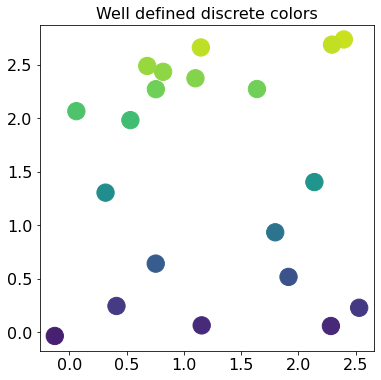

In [29]:
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm


class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgb(self, val):
        return self.scalarMap.to_rgba(val)


# setup the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# define the data between 0 and 20
NUM_VALS = 20
x = np.random.uniform(np.log(.72), np.log(20), size=NUM_VALS)
y = np.random.uniform(np.log(.72), np.log(20), size=NUM_VALS)

# define the color chart between 2 and 10 using the 'autumn_r' colormap, so
#   y <= 2  is yellow
#   y >= 10 is red
#   2 < y < 10 is between from yellow to red, according to its value
#COL = MplColorHelper('viridis', 2, 10)
COL = MplColorHelper('viridis', np.log(.72), np.log(20))

scat = ax.scatter(x, y, s=300, c=COL.get_rgb(y))
ax.set_title('Well defined discrete colors')
plt.show()


In [30]:
'''v5_texture = surface.vol_to_surf(v5_roi_nii, fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)
thr99 = np.quantile(v5_texture,.99)
v5_texture[v5_texture<thr99] = 0'''


"v5_texture = surface.vol_to_surf(v5_roi_nii, fsaverage.pial_left,interpolation='nearest',radius =1, n_samples=1)\nthr99 = np.quantile(v5_texture,.99)\nv5_texture[v5_texture<thr99] = 0"

In [31]:
tr_compensate = 1
TR = .72


In [48]:
# z_score=1
# if z_score==1:
# if tr_compensate == 1:
resid_tc = np.load(os.path.join(
    data_file_loc, 'residuals_tc_z_trialwise_earlyTR.npy'))
resid_tc_run = np.load(os.path.join(
    data_file_loc, 'residuals_tc_z_runwise_earlyTR.npy'))
# else:
#    resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc_z_trialwise_lateTR.npy'))
#    resid_tc_run = np.load(os.path.join(data_file_loc,'residuals_tc_z_runwise_lateTR.npy'))

#resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc_z.npy'))
#resid_tc_run = np.load(os.path.join(data_file_loc,'residuals_tc_z_run.npy'))
# else:
#    resid_tc = np.load(os.path.join(data_file_loc,'residuals_tc.npy'))
#    resid_tc_run = np.load(os.path.join(data_file_loc,'residuals_tc_run.npy'))
resid_tc[:, :2, :, 0].shape, resid_tc_run[:, :2, :, 2].shape


((1048, 2, 31), (1048, 2, 31))

In [32]:
early_late


'early'

In [34]:
pval_meandiff_soc_nonsoc_coaxbill = np.load(os.path.join(
    data_file_loc, f'coefs_pvals_alltimepts_COAXBILL_early.npy'))
#pval_meandiff_soc_nonsoc_coaxbill2 = np.load(os.path.join(data_file_loc,f'coefs_pvals_alltimepts_COAXBILL_late.npy'))


In [35]:
early_late = 'early'


<AxesSubplot:title={'center':'Mean difference per node and timepoint'}>

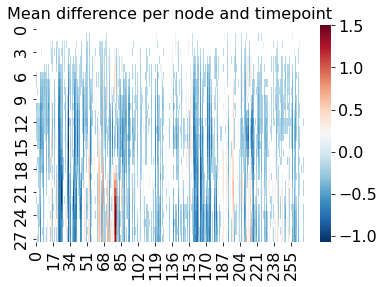

In [50]:
pval_meandiff_soc_nonsoc_coaxbill = np.load(os.path.join(
    data_file_loc, f'coefs_pvals_alltimepts_COAXBILL_{early_late}.npy'))
meanDiff_coaxbill = np.empty((268, 31))
meanDiff_coaxbill[:] = np.nan
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_coaxbill[n]  # 31 timepts
    meanDiff_coaxbill[n, pval_ < .05] = meanDiff_[pval_ < .05]
plt.title('Mean difference per node and timepoint')
sns.heatmap(meanDiff_coaxbill[:, tr0_ind:].T, cmap='RdBu_r')


<AxesSubplot:title={'center':'Mean difference per node and timepoint'}>

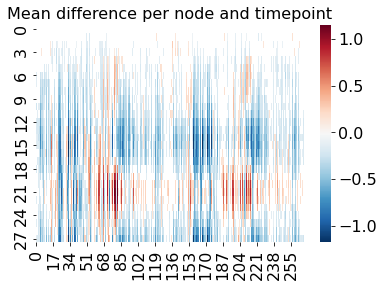

In [51]:
pval_meandiff_soc_nonsoc_coaxbill_resid = np.load(os.path.join(
    data_file_loc, f'coefs_pvals_alltimepts_COAXBILL_resid_{early_late}.npy'))
meanDiff_coaxbill_resid = np.empty((268, 31))
meanDiff_coaxbill_resid[:] = np.nan
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_coaxbill_resid[n]  # 31 timepts
    meanDiff_coaxbill_resid[n, pval_ < .05] = meanDiff_[pval_ < .05]
plt.title('Mean difference per node and timepoint')
sns.heatmap(meanDiff_coaxbill_resid[:, tr0_ind:].T, cmap='RdBu_r')


In [58]:
# first of all, best to remove subjects with < 10 responses for power in general (and to keep consistent with beh results on all movies)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i, :]))[
                        0])  # nr. of responses per sub
#subs_10resp = np.where(count_resp == 10)[0]
subs_10resp = count_resp == 10
nsubs = len(np.where(subs_10resp)[0])
len(np.where(subs_10resp)[0])


814

In [59]:
subs_10resp_subs = np.where(subs_10resp)[0]
subs_10resp_subs.shape, subs_10resp.shape
nsubs = np.where(subs_10resp_subs)[0].shape[0]
nsubs


814

In [62]:
# collapse across movies and runs (for timecourse plots)
other_movies = [2, 3, 4, 5, 6, 7, 8, 9]  # mmin,mmax = 2,10
tcs_run_resh_yes_nocoaxbill = []
tcs_run_resh_no_nocoaxbill = []
residuals_run_resh_yes_nocoaxbill = []
residuals_run_resh_no_nocoaxbill = []
subs_resh_yes_nocoaxbill = []
subs_resh_no_nocoaxbill = []
for m in other_movies:
    rows1 = subs_10resp & (responses[:, m] == 1)
    rows2 = subs_10resp & (responses[:, m] == 0)
    tcs_run_resh_yes_nocoaxbill.append(
        tcs_run_z[rows1, :, :, m])  # subsm * 268 * 31
    tcs_run_resh_no_nocoaxbill.append(
        tcs_run_z[rows2, :, :, m])  # subsm * 268 * 31
    residuals_run_resh_yes_nocoaxbill.append(
        resid_tc_run[rows1, :, :, m])  # subsm * 268 * 31
    residuals_run_resh_no_nocoaxbill.append(
        resid_tc_run[rows2, :, :, m])  # subsm * 268 * 31
    # subsm * 268 * 31, keep track of subject seq
    subs_resh_yes_nocoaxbill += list(np.where(rows1)[0])
    # subsm * 268 * 31
    subs_resh_no_nocoaxbill += list(np.where(rows2)[0])
tcs_run_resh_yes_nocoaxbill = np.concatenate(
    tcs_run_resh_yes_nocoaxbill, axis=0)
tcs_run_resh_no_nocoaxbill = np.concatenate(tcs_run_resh_no_nocoaxbill, axis=0)
residuals_run_resh_yes_nocoaxbill = np.concatenate(
    residuals_run_resh_yes_nocoaxbill, axis=0)
residuals_run_resh_no_nocoaxbill = np.concatenate(
    residuals_run_resh_no_nocoaxbill, axis=0)
print('Across all movies except coax-bill: \nyes:' +
      str(tcs_run_resh_yes_nocoaxbill.shape) + ',\nno:' + str(tcs_run_resh_no_nocoaxbill.shape))


Across all movies except coax-bill: 
yes:(3209, 268, 31),
no:(2849, 268, 31)


In [61]:
movie_ind_yes, movie_ind_no


(0, 1)

In [33]:
# subs who respondec "Social" to COAXING-B and "Non-social" to BILLIARD-A
subs = np.where((responses[:, movie_ind_yes] == 1) &
                (responses[:, movie_ind_no] == 0))[0]
nsubs = np.where(subs)[0].shape[0]
subs.shape, nsubs


((870,), 870)

# RESIDUAL TIMECOURSE FIGURES


In [43]:
tr_compensate

1

In [46]:
plot_residuals = 1
df_minus10_0_right.head()

In [46]:
# if plot_residuals:
#    df_minus10_0_right = df_minus10_0_right.sort_values(by=['Earliest_pt_corr_resid', 'MNIy'])
#    df_minus10_0_left = df_minus10_0_left.sort_values(by=['Earliest_pt_corr_resid', 'MNIy'])
# else:
df_minus10_0_right = df_minus10_0_right.sort_values(
    by=['Earliest_pt_corr', 'MNIy'])
df_minus10_0_right = df_minus10_0_right.reset_index()
df_minus10_0_left = df_minus10_0_left.sort_values(
    by=['Earliest_pt_corr', 'MNIy'])
df_minus10_0_left = df_minus10_0_left.reset_index()


In [47]:
df_minus10_0_right


,level_0,index,Nodes,Earliest_pt_corr_resid,Earliest_pt_corr,MNIy,MNIz,name
0,0,2,66,5.0,2.0,-69.279029,-17.441941,54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
1,1,1,65,5.0,2.0,-59.801802,-14.716216,35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
2,2,0,64,5.0,2.0,-43.727367,8.616025,51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
3,3,4,69,5.0,2.0,-43.375770,-17.652977,54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_posterior_division
4,4,8,80,6.0,3.0,-91.904468,-10.795069,55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus
5,5,5,73,6.0,3.0,-74.239130,2.606280,95.78% Lateral_Occipital_Cortex_inferior_division
6,6,3,68,6.0,3.0,-56.281977,-4.796512,48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
7,9,7,77,21.0,8.0,-95.884226,6.633864,93.49% Occipital_Pole; 6.22% Lateral_Occipital_Cortex_inferior_division
8,7,6,75,11.0,8.0,-83.387648,-11.250986,60.71% Occipital_Fusiform_Gyrus; 21.94% Lingual_Gyrus; 17.21% Occipital_Pole
9,8,9,127,11.0,8.0,-9.832700,4.904943,88.97% Right_Thalamus; 7.60% Right_Lateral_Ventricle


In [73]:
# right hem, residuals sorted

# RIGHT HEM
coaxbill_col = 1
[ymin,ymax] = [-.7,2.5]
xlbls = [-2,0,5,10,15,20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
nrows = df_minus10_0_right.shape[0]
line_loc = []
fig, ax = plt.subplots(nrows, ncols = 4, sharex=True, sharey=True, figsize = (15,15)) # figsize = (20,15))
#plt.suptitle('Left hemisphere', fontweight='bold')    
for row in df_minus10_0_right.iterrows(): #for i,n in enumerate(df['Nodes']):
     #fig, ax = plt.figure(i+1,figsize=(10,5))   
     r = row[0] #print(r)
     n = int(row[1]['Nodes'])

     ax1 = ax[r,0]
     plot_slice(fig,ax1,row,'right')
     
     ax1 = ax[r,1]
     if plot_residuals:
          movieTC_yes = resid_tc[subs,n,:,0]#tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
          movieTC_no  = resid_tc[subs,n,:,1]#tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
          sig = np.where(~np.isnan(meanDiff_coaxbill_resid[n,:]))[0]   # for the grey asterisks
     
     else:
          movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
          movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
          sig = np.where(~np.isnan(meanDiff_coaxbill[n,:]))[0]   # for the grey asterisks
     
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_ylim(ymin,ymax)
     ax1.vlines(tr0_ind+5,ymin,ymax,color = 'k',label = 'Expected\ndecision time')
     ax1.set_yticks([0,2.5])
     #ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
     #plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
     if r==0:
          ax1.set_title(f'COAX-BILL',fontweight = 'bold',fontsize=32)
     ax1.plot(sig,np.repeat(1.7,len(sig)),color = [.6,.6,.6],ls = 'None',marker = '*',label ="All\np<.05unc.")
     if plot_residuals:
          ax1.plot(earliest_pt_coaxbill_resid[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest\np<.05unc.")
          line_loc.append(earliest_pt_coaxbill_resid[n])#earliest_pt_coaxbill[n])
     else:
          ax1.plot(earliest_pt_coaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest\np<.05unc.")
          line_loc.append(earliest_pt_coaxbill[n])
     
     #if end_diff_coaxbill[n] == 1:
     #    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     if r == np.floor(df_minus10_0_right.shape[0]/2):
          if plot_residuals==0:
               ax1.set_ylabel('Blood oxygenation level (BOLD actiivty, a.u.)\n ',fontsize = 32)
          else:
               ax1.set_ylabel('Residual BOLD actiivty (a.u.)\n ',fontsize = 32)

     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)
     #sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]    
     if r == 0:
          ax1.legend()
          handles, labels = ax1.get_legend_handles_labels()
          order = [4,3,2,1,0]
          ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=1, bbox_to_anchor=[5,1],fontsize=28)#=[1,3])

     if plot_residuals:
          movieTC_yes = residuals_run_resh_yes_nocoaxbill[:,n,:] #tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
          movieTC_no  = residuals_run_resh_no_nocoaxbill[:,n,:] #tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
     else:
          movieTC_yes = tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
          movieTC_no  = tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
          
     ax1 = ax[r,2]
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     if r==0:
          ax1.set_title(f'All except\nCOAX-BILL',fontweight = 'bold',fontsize = 32)
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     ax1.set_ylim(ymin,ymax)
     
     #plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
     #plt.plot(earliest_pt_all_nocoaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
     #if end_diff_rand[n] == 1:
     #    plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)

     movie_ind = 4
     if plot_residuals:
          movieTC_yes = resid_tc_run[responses[:,movie_ind]==1,n,:,movie_ind] #tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
          movieTC_no  = resid_tc_run[responses[:,movie_ind]==0,n,:,movie_ind] #tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts

     else:
          movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
          movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts

     #sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    

     ax1 =  ax[r,3]
     ax1.set_ylim(ymin,ymax)
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
     ax1.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
     if r==0:
          ax1.set_title(f'RANDOM\nMECH',fontweight = 'bold',fontsize = 32)
     ax1.vlines(tr0_ind,-1,2,color=[.8,.8,.8])
     ax1.hlines(0,0,31,color=[.8,.8,.8])
     ax1.set_xticks(x_ticks)
     ax1.set_xticklabels(xlbls)
     
     if r == nrows-1:
          ax1.set_xlabel('Time(sec)',fontsize=32)
     turn_axes_off(ax1)

col = COL.get_rgb([np.log((i-3)*TR) for i in line_loc])
for i in range(len(line_loc)):
     xyA = (line_loc[i], 2)
     xyB = (line_loc[i], 0)
     coordsA = "data"
     coordsB = "data"
     #if plot_residuals:
     #     #if line_loc[i] != line_loc[i-1]:
     #     con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
     #                         axesA=ax[i,coaxbill_col], axesB=ax[nrows-1,coaxbill_col],color=col[i],alpha = .8, lw = 2)#col[i])
     #     ax[nrows-1,coaxbill_col].add_artist(con)
     #else:
     if line_loc[i] != line_loc[i-1]:
          con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                              axesA=ax[i,coaxbill_col], axesB=ax[nrows-1,coaxbill_col],color=col[i],alpha = .8, lw = 2)#col[i])
     ax[nrows-1,coaxbill_col].add_artist(con)

#fig.text(0.02,.97,'Postero-lateral node timecourses \n(right hemisphere)',fontsize=20)
if plot_residuals:
     fileName = f'ROIs/timcecourses_righthem_resid_{early_late}.png'
else:
     fileName = f'ROIs/timcecourses_righthem_{early_late}.png'

plt.savefig(os.path.join(fig_save_loc,fileName),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')
#plt.tight_layout()

NameError: name 'df_minus10_0_right' is not defined

In [50]:
df_minus10_0_right


,level_0,index,Nodes,Earliest_pt_corr_resid,Earliest_pt_corr,MNIy,MNIz,name
0,0,2,66,5.0,2.0,-69.279029,-17.441941,54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
1,1,1,65,5.0,2.0,-59.801802,-14.716216,35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
2,2,0,64,5.0,2.0,-43.727367,8.616025,51.09% Middle_Temporal_Gyrus_temporooccipital_part; 26.64% Supramarginal_Gyrus_posterior_division; 12.90% Angular_Gyrus; 6.04% Superior_Temporal_Gyrus_posterior_division
3,3,4,69,5.0,2.0,-43.375770,-17.652977,54.11% Inferior_Temporal_Gyrus_temporooccipital_part; 17.25% Middle_Temporal_Gyrus_temporooccipital_part; 14.99% Middle_Temporal_Gyrus_posterior_division; 13.55% Inferior_Temporal_Gyrus_posterior_division
4,4,8,80,6.0,3.0,-91.904468,-10.795069,55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus
5,5,5,73,6.0,3.0,-74.239130,2.606280,95.78% Lateral_Occipital_Cortex_inferior_division
6,6,3,68,6.0,3.0,-56.281977,-4.796512,48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
7,9,7,77,21.0,8.0,-95.884226,6.633864,93.49% Occipital_Pole; 6.22% Lateral_Occipital_Cortex_inferior_division
8,7,6,75,11.0,8.0,-83.387648,-11.250986,60.71% Occipital_Fusiform_Gyrus; 21.94% Lingual_Gyrus; 17.21% Occipital_Pole
9,8,9,127,11.0,8.0,-9.832700,4.904943,88.97% Right_Thalamus; 7.60% Right_Lateral_Ventricle


In [51]:
df_minus10_0_left


,level_0,index,Nodes,Earliest_pt_corr_resid,Earliest_pt_corr,MNIy,MNIz,name
0,0,6,205,4.0,1.0,-70.426343,-13.913345,55.19% Lateral_Occipital_Cortex_inferior_division; 29.41% Occipital_Fusiform_Gyrus; 8.65% Temporal_Occipital_Fusiform_Cortex; 6.75% Inferior_Temporal_Gyrus_temporooccipital_part
1,1,5,199,4.0,1.0,-52.230769,-17.384615,53.17% Temporal_Occipital_Fusiform_Cortex; 42.99% Inferior_Temporal_Gyrus_temporooccipital_part
2,2,1,191,4.0,1.0,-47.523911,5.285866,52.60% Middle_Temporal_Gyrus_temporooccipital_part; 21.00% Supramarginal_Gyrus_posterior_division; 14.85% Middle_Temporal_Gyrus_posterior_division; 7.53% Superior_Temporal_Gyrus_posterior_division
3,3,12,213,5.0,2.0,-96.751159,-10.064915,87.06% Occipital_Pole; 8.47% Lateral_Occipital_Cortex_inferior_division
4,4,9,209,5.0,2.0,-84.060837,-3.954373,80.83% Lateral_Occipital_Cortex_inferior_division; 10.06% Occipital_Fusiform_Gyrus; 9.11% Occipital_Pole
5,5,8,208,6.0,3.0,-67.206226,0.998703,78.86% Lateral_Occipital_Cortex_inferior_division; 15.18% Middle_Temporal_Gyrus_temporooccipital_part; 5.84% Inferior_Temporal_Gyrus_temporooccipital_part
6,6,10,211,7.0,4.0,-98.154190,7.675978,99.66% Occipital_Pole
7,7,11,212,7.0,4.0,-83.967146,-12.991786,52.00% Occipital_Fusiform_Gyrus; 34.15% Lingual_Gyrus; 13.03% Occipital_Pole
8,8,4,198,7.0,4.0,-49.952963,-14.090310,43.70% Inferior_Temporal_Gyrus_temporooccipital_part; 24.81% Middle_Temporal_Gyrus_temporooccipital_part; 15.32% Middle_Temporal_Gyrus_posterior_division; 10.71% Inferior_Temporal_Gyrus_posterior_division
9,9,7,206,9.0,6.0,-63.215054,-12.244624,39.92% Occipital_Fusiform_Gyrus; 36.69% Temporal_Occipital_Fusiform_Cortex; 23.39% Lingual_Gyrus


In [56]:
plot_residuals


1

In [44]:
# LEFT HEM, residuals sorted

coaxbill_col = 1
[ymin, ymax] = [-.7, 2.5]
xlbls = [-2, 0, 5, 10, 15, 20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
nrows = df_minus10_0_left.shape[0]
line_loc = []
fig, ax = plt.subplots(nrows, ncols=4, sharex=True,
                       sharey=True, figsize=(15, 20))  # figsize = (20,15))
#plt.suptitle('Left hemisphere', fontweight='bold')
for row in df_minus10_0_left.iterrows():  # for i,n in enumerate(df['Nodes']):
    #fig, ax = plt.figure(i+1,figsize=(10,5))
    r = row[0]  # print(r)
    n = int(row[1]['Nodes'])

    ax1 = ax[r, 0]
    plot_slice(fig, ax1, row, 'left')

    ax1 = ax[r, 1]
    if plot_residuals:
        # tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
        movieTC_yes = resid_tc[subs, n, :, 0]
        # tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
        movieTC_no = resid_tc[subs, n, :, 1]
        sig = np.where(~np.isnan(meanDiff_coaxbill_resid[n, :]))[
            0]   # for the grey asterisks

    else:
        movieTC_yes = tcs_trial_z[subs, n, :, 0]  # nsubs * ntimepts
        movieTC_no = tcs_trial_z[subs, n, :, 1]  # nsubs * ntimepts
        sig = np.where(~np.isnan(meanDiff_coaxbill[n, :]))[
            0]   # for the grey asterisks

    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
        movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
        movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
    ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
    ax1.hlines(0, 0, 31, color=[.8, .8, .8])
    ax1.set_ylim(ymin, ymax)
    ax1.vlines(tr0_ind+5, ymin, ymax, color='k',
               label='Expected\ndecision time')
    ax1.set_yticks([0, 2.5])
    # ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
    #plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
    if r == 0:
        ax1.set_title(f'COAX-BILL', fontweight='bold', fontsize=32)
    ax1.plot(sig, np.repeat(1.7, len(sig)),
             color=[.6, .6, .6], ls='None', marker='*', label="All\np<.05unc.")
    if plot_residuals:
        ax1.plot(earliest_pt_coaxbill_resid[n], 1.9, color='k', ls='None',
                 marker='v', mfc='k', markersize=8, label="earliest\np<.05unc.")
        line_loc.append(earliest_pt_coaxbill_resid[n])
    else:
        ax1.plot(earliest_pt_coaxbill[n], 1.9, color='k', ls='None',
                 marker='v', mfc='k', markersize=8, label="earliest\np<.05unc.")
        line_loc.append(earliest_pt_coaxbill[n])
    # if end_diff_coaxbill[n] == 1:
    #    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(xlbls)
    if r == np.floor(df_minus10_0_left.shape[0]/2):
        if plot_residuals == 0:
            ax1.set_ylabel(
                'Blood oxygenation level (BOLD actiivty, a.u.)\n ', fontsize=32)
        else:
            ax1.set_ylabel('Residual BOLD actiivty (a.u.)\n ', fontsize=32)
    if r == nrows-1:
        ax1.set_xlabel('Time(sec)', fontsize=32)
    turn_axes_off(ax1)
    #sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
    if r == 0:
        # ax1.legend()
        handles, labels = ax1.get_legend_handles_labels()
        order = [4, 3, 2, 1, 0]
        # ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2, bbox_to_anchor=[4,3], fontsize=32)#=[1,3])
        ax1.legend([handles[idx] for idx in order], [labels[idx]
                                                     for idx in order], bbox_to_anchor=[5, 1], fontsize=28)  # =[1,3])

    if plot_residuals:
        # tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
        movieTC_yes = residuals_run_resh_yes_nocoaxbill[:, n, :]
        # tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
        movieTC_no = residuals_run_resh_no_nocoaxbill[:, n, :]
    else:
        movieTC_yes = tcs_run_resh_yes_nocoaxbill[:, n, :]  # nsubs * ntimepts
        movieTC_no = tcs_run_resh_no_nocoaxbill[:, n, :]  # nsubs * ntimepts

    ax1 = ax[r, 2]
    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
        movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
        movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
    ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
    ax1.hlines(0, 0, 31, color=[.8, .8, .8])
    if r == 0:
        ax1.set_title(f'All except\nCOAX-BILL', fontweight='bold', fontsize=32)
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(xlbls)
    ax1.set_ylim(ymin, ymax)

    #plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    #plt.plot(earliest_pt_all_nocoaxbill[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    # if end_diff_rand[n] == 1:
    #    plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
    if r == nrows-1:
        ax1.set_xlabel('Time(sec)', fontsize=32)
    turn_axes_off(ax1)

    movie_ind = 4
    if plot_residuals:
        # tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
        movieTC_yes = resid_tc_run[responses[:,
                                             movie_ind] == 1, n, :, movie_ind]
        # tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
        movieTC_no = resid_tc_run[responses[:,
                                            movie_ind] == 0, n, :, movie_ind]
    else:
        movieTC_yes = tcs_run_z[responses[:, movie_ind]
                                == 1, n, :, movie_ind]  # nsubs * ntimepts
        movieTC_no = tcs_run_z[responses[:, movie_ind]
                               == 0, n, :, movie_ind]  # nsubs * ntimepts

    ax1 = ax[r, 3]
    ax1.set_ylim(ymin, ymax)
    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
        movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
    ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
        movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
    if r == 0:
        ax1.set_title(f'RANDOM \nMECH', fontweight='bold', fontsize=32)
    ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
    ax1.hlines(0, 0, 31, color=[.8, .8, .8])
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(xlbls)

    if r == nrows-1:
        ax1.set_xlabel('Time(sec)', fontsize=32)
    turn_axes_off(ax1)


col = COL.get_rgb([np.log((i-3)*TR) for i in line_loc])
for i in range(len(line_loc)):
    xyA = (line_loc[i], 2)
    xyB = (line_loc[i], 0)
    coordsA = "data"
    coordsB = "data"
    if plot_residuals:
        con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                              axesA=ax[i, coaxbill_col], axesB=ax[nrows-1, coaxbill_col], color=col[i], alpha=.8, lw=2)  # col[i])
        ax[nrows-1, coaxbill_col].add_artist(con)
    else:
        if line_loc[i] != line_loc[i-1]:  # doesn't work when all nodes start at the same timept
            con = ConnectionPatch(xyA=xyA, xyB=xyB, coordsA=coordsA, coordsB=coordsB,
                                  axesA=ax[i, coaxbill_col], axesB=ax[nrows-1, coaxbill_col], color=col[i], alpha=.8, lw=2)  # col[i])
        ax[nrows-1, coaxbill_col].add_artist(con)
if plot_residuals:
    fileName = f'ROIs/timcecourses_lefthem_resid_{early_late}.png'
else:
    fileName = f'ROIs/timcecourses_lefthem_{early_late}.png'
plt.savefig(os.path.join(fig_save_loc, fileName), dpi=300,
            bbox_inches='tight', facecolor='white', edgecolor='none')
# plt.tight_layout()


NameError: name 'df_minus10_0_left' is not defined

# Plot an ROI

In [36]:
TR = .72


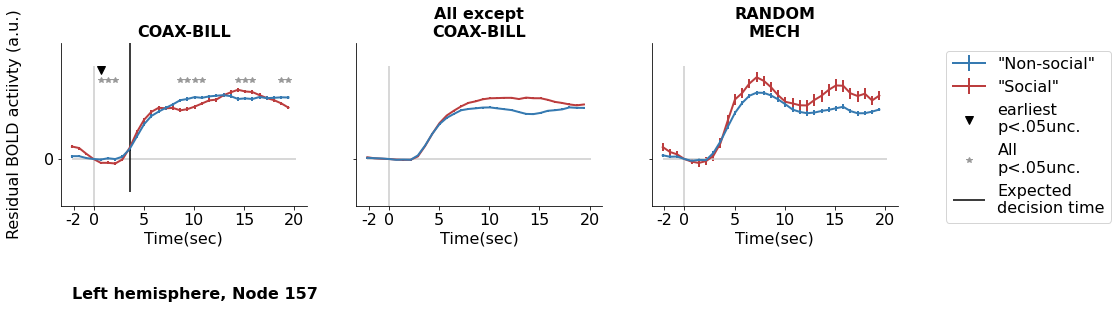

In [91]:
# right hem, residuals sorted

coaxbill_col = 1
[ymin, ymax] = [-.7, 2.5]
xlbls = [-2, 0, 5, 10, 15, 20]
x_ticks = [(i/TR)+tr0_ind for i in xlbls]
xlbls = [str(i) for i in xlbls]
line_loc = []
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True,
                       sharey=True, figsize=(15, 3))  # figsize = (20,15))
n = 156
ax1 = ax[0]
ax1.text(0.05,-3,f'Left hemisphere, Node {n+1}', fontweight='bold')
if plot_residuals:
    # tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
    movieTC_yes = resid_tc[subs, n, :, 0]
    # tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
    movieTC_no = resid_tc[subs, n, :, 1]
    sig = np.where(~np.isnan(meanDiff_coaxbill_resid[n, :]))[
        0]   # for the grey asterisks

else:
    movieTC_yes = tcs_trial_z[subs, n, :, 0]  # nsubs * ntimepts
    movieTC_no = tcs_trial_z[subs, n, :, 1]  # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_coaxbill[n, :]))[
        0]   # for the grey asterisks

ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
    movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
    movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
ax1.hlines(0, 0, 31, color=[.8, .8, .8])
ax1.set_ylim(ymin, ymax)
ax1.vlines(tr0_ind+5, ymin, ymax, color='k', label='Expected\ndecision time')
ax1.set_yticks([0, 4])
# ax[r,0].axvspan(tr0_ind,tr0_ind+5,color='g',)
#plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
if r == 0:
    ax1.set_title(f'COAX-BILL', fontweight='bold')
ax1.plot(sig, np.repeat(1.7, len(sig)),
         color=[.6, .6, .6], ls='None', marker='*', label="All\np<.05unc.")
if plot_residuals:
    ax1.plot(earliest_pt_coaxbill_resid[n], 1.9, color='k', ls='None',
             marker='v', mfc='k', markersize=8, label="earliest\np<.05unc.")
    line_loc.append(earliest_pt_coaxbill_resid[n])  # earliest_pt_coaxbill[n])
else:
    ax1.plot(earliest_pt_coaxbill[n], 1.9, color='k', ls='None',
             marker='v', mfc='k', markersize=8, label="earliest\np<.05unc.")
    line_loc.append(earliest_pt_coaxbill[n])

# if end_diff_coaxbill[n] == 1:
#    ax[r,0].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(xlbls)
if plot_residuals == 0:
    ax1.set_ylabel(
        'BOLD actiivty (a.u.)\n ')
else:
    ax1.set_ylabel('Residual BOLD actiivty (a.u.)\n ')

ax1.set_xlabel('Time(sec)')
turn_axes_off(ax1)
#sig = np.where(~np.isnan(coefs_all_nocoaxbill[n,:]))[0]
if r == 0:
    ax1.legend()
    handles, labels = ax1.get_legend_handles_labels()
    order = [4, 3, 2, 1, 0]
    ax1.legend([handles[idx] for idx in order], [labels[idx]
                                                 for idx in order], ncol=1, bbox_to_anchor=[4.3, 1])  # =[1,3])

if plot_residuals:
    # tcs_run_resh_yes_nocoaxbill[:,n,:] # nsubs * ntimepts
    movieTC_yes = residuals_run_resh_yes_nocoaxbill[:, n, :]
    # tcs_run_resh_no_nocoaxbill[:,n,:] # nsubs * ntimepts
    movieTC_no = residuals_run_resh_no_nocoaxbill[:, n, :]
else:
    movieTC_yes = tcs_run_resh_yes_nocoaxbill[:, n, :]  # nsubs * ntimepts
    movieTC_no = tcs_run_resh_no_nocoaxbill[:, n, :]  # nsubs * ntimepts

ax1 = ax[1]
ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
    movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
    movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
ax1.hlines(0, 0, 31, color=[.8, .8, .8])
if r == 0:
    ax1.set_title(f'All except\nCOAX-BILL', fontweight='bold')
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(xlbls)
ax1.set_ylim(ymin, ymax)

ax1.set_xlabel('Time(sec)')
turn_axes_off(ax1)

movie_ind = 4
if plot_residuals:
    # tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_yes = resid_tc_run[responses[:, movie_ind] == 1, n, :, movie_ind]
    # tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no = resid_tc_run[responses[:, movie_ind] == 0, n, :, movie_ind]

else:
    movieTC_yes = tcs_run_z[responses[:, movie_ind]
                            == 1, n, :, movie_ind]  # nsubs * ntimepts
    movieTC_no = tcs_run_z[responses[:, movie_ind]
                           == 0, n, :, movie_ind]  # nsubs * ntimepts

#sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]

ax1 = ax[2]
ax1.set_ylim(ymin, ymax)
ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_yes, axis=0), stats.sem(
    movieTC_yes, axis=0, nan_policy='omit'), color=red_rgb, linewidth=2, label='"Social"')
ax1.errorbar(range(movieTC_yes.shape[1]), np.nanmean(movieTC_no, axis=0), stats.sem(
    movieTC_no, axis=0, nan_policy='omit'), color=blue_rgb, linewidth=2, label='"Non-social"')
if r == 0:
    ax1.set_title(f'RANDOM\nMECH', fontweight='bold')
ax1.vlines(tr0_ind, -1, 2, color=[.8, .8, .8])
ax1.hlines(0, 0, 31, color=[.8, .8, .8])
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(xlbls)
ax1.set_ylim(-1,2.5)

ax1.set_xlabel('Time(sec)')
turn_axes_off(ax1)